In [62]:
import scipy.io as sio
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


# Loading the data
data_set = sio.loadmat("WLDataCW.mat")

X_data = data_set['data']

X_data.shape

X_data = np.transpose(X_data)

X_data.shape


(360, 512, 62)

In [63]:

labels = data_set['label']

labels.shape

labels = np.transpose(labels)

labels.shape

(360, 1)

In [64]:

len(X_data)

len(labels)


360

In [65]:

# Initialize the StandardScaler object and  Reshaping the input data

scalerobj = StandardScaler()
X_transformed = scalerobj.fit_transform(X_data.reshape(-1, X_data.shape[-1])).reshape(X_data.shape)

X_transformed.shape

(360, 512, 62)

In [66]:

# Perform data preprocessing and split the data into training and testing sets for model training and evaluation.

x_train, x_test, y_train, y_test = train_test_split(X_transformed, labels, test_size=0.2, random_state=42)

In [67]:
# Initializing the Sequential model and adding multiple convolutional layers


model_neuralnetwork = keras.Sequential()

model_neuralnetwork.add(layers.Conv1D(filters=5, kernel_size=3, strides=1, input_shape=(512, 62)))  # 1
model_neuralnetwork.add(layers.BatchNormalization())
model_neuralnetwork.add(layers.LeakyReLU())
model_neuralnetwork.add(layers.MaxPool1D(pool_size=2, strides=2))

model_neuralnetwork.add(layers.Conv1D(filters=5, kernel_size=3, strides=1))  # 2
model_neuralnetwork.add(layers.LeakyReLU())
model_neuralnetwork.add(layers.MaxPool1D(pool_size=2, strides=2))
model_neuralnetwork.add(layers.Dropout(0.5))

model_neuralnetwork.add(layers.Conv1D(filters=5, kernel_size=3, strides=1))  # 3
model_neuralnetwork.add(layers.LeakyReLU())
model_neuralnetwork.add(layers.AveragePooling1D(pool_size=2, strides=2))
model_neuralnetwork.add(layers.Dropout(0.5))

model_neuralnetwork.add(layers.Conv1D(filters=5, kernel_size=3, strides=1))  # 4
model_neuralnetwork.add(layers.LeakyReLU())
model_neuralnetwork.add(layers.AveragePooling1D(pool_size=2, strides=2))

model_neuralnetwork.add(layers.Conv1D(filters=5, kernel_size=3, strides=1))  # 5
model_neuralnetwork.add(layers.LeakyReLU())
model_neuralnetwork.add(layers.GlobalAveragePooling1D())

# Flatten the output

model_neuralnetwork.add(layers.Flatten())

model_neuralnetwork.add(layers.Dense(128, activation='sigmoid'))
model_neuralnetwork.add(layers.Dense(1, activation='sigmoid'))

model_neuralnetwork.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

model_neuralnetwork.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_55 (Conv1D)          (None, 510, 5)            935       
                                                                 
 batch_normalization_11 (Ba  (None, 510, 5)            20        
 tchNormalization)                                               
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 510, 5)            0         
                                                                 
 max_pooling1d_22 (MaxPooli  (None, 255, 5)            0         
 ng1D)                                                           
                                                                 
 conv1d_56 (Conv1D)          (None, 253, 5)            80        
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 253, 5)          

Epoch 1/10
4/4 [==============================] - 2s 133ms/step - loss: 0.7050 - accuracy: 0.4913 - val_loss: 0.6927 - val_accuracy: 0.5172
Epoch 2/10
4/4 [==============================] - 0s 50ms/step - loss: 0.6948 - accuracy: 0.4913 - val_loss: 0.6929 - val_accuracy: 0.4828
Epoch 3/10
4/4 [==============================] - 0s 48ms/step - loss: 0.6928 - accuracy: 0.5087 - val_loss: 0.6963 - val_accuracy: 0.4828
Epoch 4/10
4/4 [==============================] - 0s 52ms/step - loss: 0.6933 - accuracy: 0.5087 - val_loss: 0.6948 - val_accuracy: 0.4828
Epoch 5/10
4/4 [==============================] - 0s 78ms/step - loss: 0.6924 - accuracy: 0.5087 - val_loss: 0.6932 - val_accuracy: 0.4828
Epoch 6/10
4/4 [==============================] - 0s 91ms/step - loss: 0.6913 - accuracy: 0.5087 - val_loss: 0.6901 - val_accuracy: 0.4828
Epoch 7/10
4/4 [==============================] - 0s 89ms/step - loss: 0.6899 - accuracy: 0.5261 - val_loss: 0.6878 - val_accuracy: 0.7069
Epoch 8/10
4/4 [==========

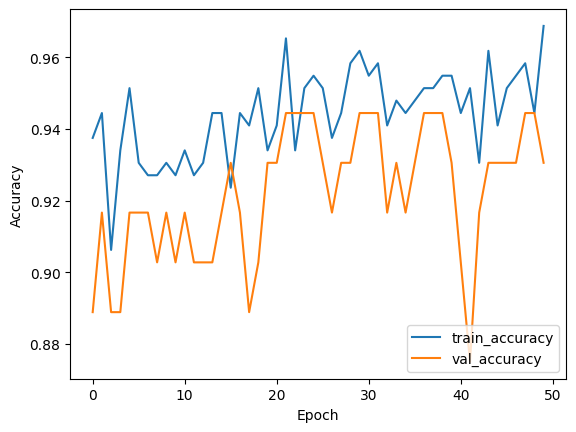

In [68]:
# Performing 5-fold cross-validation

kf = KFold(n_splits=5)

X_transformed.shape

accuracy_list = []
validation_accuracy_list = []

for train_index, test_index in kf.split(x_train, y_train):
    X_train_fold, X_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    history_fold = model_neuralnetwork.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(X_test_fold, y_test_fold))
    validation_accuracy_list.append(history_fold.history['val_accuracy'][len(history_fold.history['val_accuracy']) - 1])
    print(validation_accuracy_list)


mean_validation_accuracy = np.mean(validation_accuracy_list)
print("Mean Validation Accuracy:", mean_validation_accuracy)


history_final = model_neuralnetwork.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

plt.plot(history_final.history['accuracy'], label='train_accuracy')
plt.plot(history_final.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('accuracy_plot.pdf', dpi=1200)